In [1]:
import numpy as np
import pandas as pd
import os
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)
#num_words 10000 -> Metinlerde en çok geçen 10000 kelime kullanılacaktır.

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
train_data[0]
# Bu train datanın ilk listesidir. Buradaki sayılar, bu kelimelerin veriseti üzerindeki indexlerini gösterir.

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels
# Buradaki 1 pozitifi, 0 ise negatifi temsil eder.

array([1, 0, 0, ..., 0, 1, 0])

<Axes: ylabel='Count'>

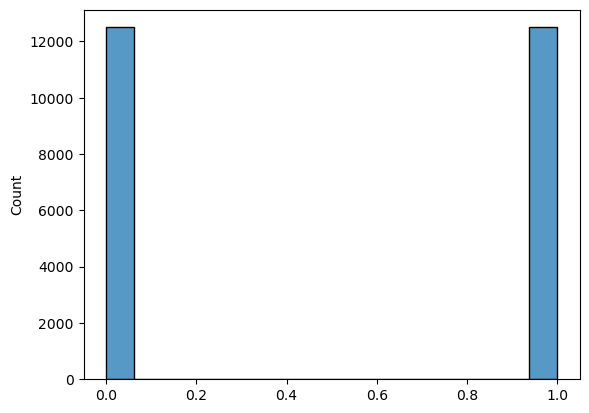

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=train_labels)

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    # all-zero matrix oluşturuyoruz
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. 
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
# Burda yaptığımız yöntem elimizdeki input ile direkt olarak networkü besleyememizdendir.
# Maximum değer 10.000 olacağındand dolayı (kullandığımız index sayısı 10.000), listemizde var olan
# indexlere 1, olmayanlara ise 0 setlememiz gerekiyor. (One Hot Encoding)

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
# train_labels ve test_labels'ları vectörize ediyoruz.

In [7]:
len(x_train[0])
# Böylece x_train artık 10.0000 uzunluktaki listelerden oluşuyor.

10000

In [8]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

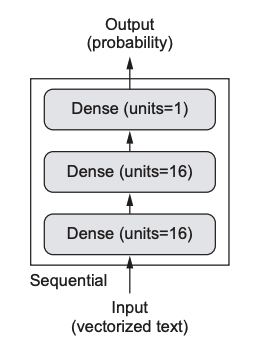

In [9]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 59ms/step - loss: 0.5416 - binary_accuracy: 0.7896 - val_loss: 0.4247 - val_binary_accuracy: 0.8668
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3397 - binary_accuracy: 0.8952 - val_loss: 0.3302 - val_binary_accuracy: 0.8792
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2511 - binary_accuracy: 0.9213 - val_loss: 0.2917 - val_binary_accuracy: 0.8874
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1984 - binary_accuracy: 0.9362 - val_loss: 0.2834 - val_binary_accuracy: 0.8868
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1614 - binary_accuracy: 0.9483 - val_loss: 0.2758 - val_binary_accuracy: 0.8895
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1334 - binary_accuracy: 0.9583 - val_loss: 0.3102 - val_binary_accuracy: 0.8792
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - los

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

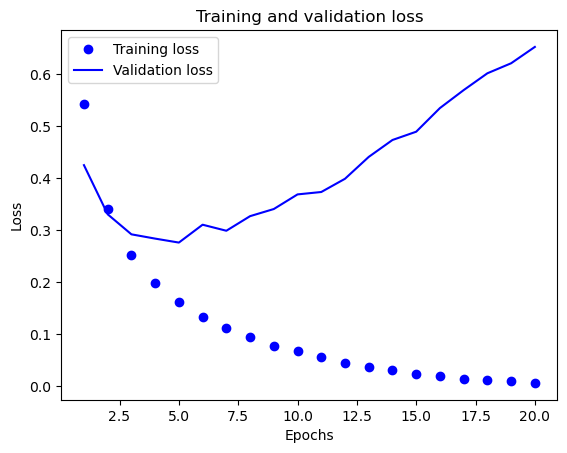

In [15]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

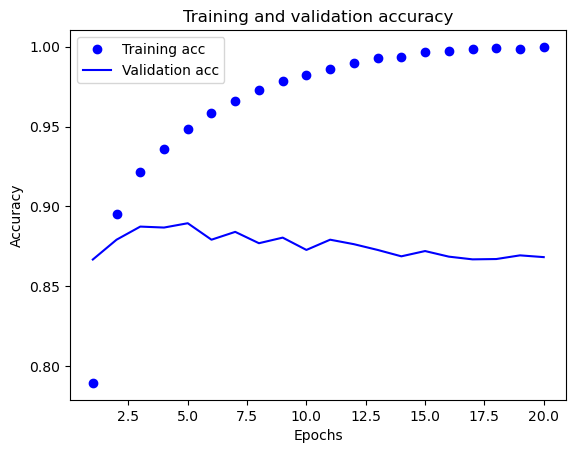

In [16]:
plt.clf()

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 1s 17ms/step - loss: 0.4615 - accuracy: 0.8187
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2730 - accuracy: 0.9021
Epoch 3/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2127 - accuracy: 0.9234
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2913 - accuracy: 0.8840


In [18]:
results

[0.2912677228450775, 0.8840000033378601]

In [19]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.25115082],
       [0.9998663 ],
       [0.946709  ],
       ...,
       [0.09641767],
       [0.10224994],
       [0.6713196 ]], dtype=float32)